In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
df = pd.read_csv("downloads/data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [12]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode", "highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [13]:
df.shape

(11914, 11)

In [14]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
Vehicle Size    11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [15]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (970, 11)


In [17]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
Vehicle Size    11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [18]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,28,18,34500


In [19]:
df.count()

Make            10944
Model           10944
Year            10944
HP              10875
Cylinders       10914
Transmission    10944
Drive Mode      10944
Vehicle Size    10944
MPG-H           10944
MPG-C           10944
Price           10944
dtype: int64

In [20]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
Vehicle Size     0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [21]:
df = df.dropna()
df.count()

Make            10846
Model           10846
Year            10846
HP              10846
Cylinders       10846
Transmission    10846
Drive Mode      10846
Vehicle Size    10846
MPG-H           10846
MPG-C           10846
Price           10846
dtype: int64

In [22]:
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
Vehicle Size    0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


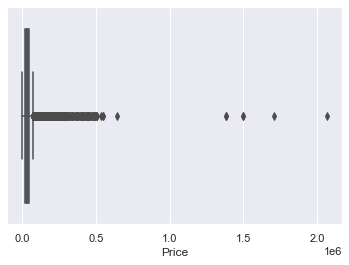

In [23]:
sns.boxplot(x=df['Price'])

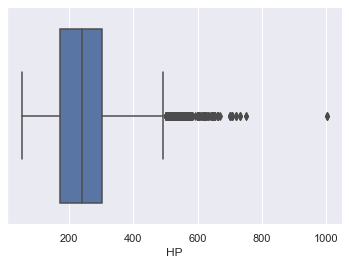

In [24]:
sns.boxplot(x=df['HP'])

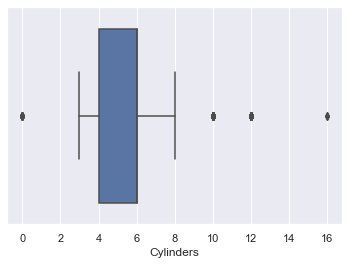

In [25]:
sns.boxplot(x=df['Cylinders'])

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21372.5
dtype: float64


In [29]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(0, 11)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:208: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


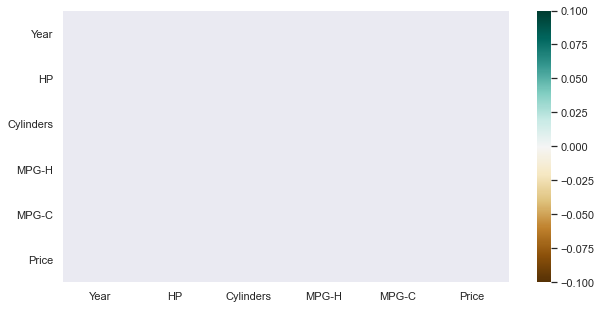

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.['HP'], df['Price'])
ax.set_xlabel('HP')

In [40]:
plt.jet()
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=0)

<Figure size 432x288 with 0 Axes>